In [1]:
import numpy as np
#import sklearn
import pandas as pd

In [2]:
df_grupo_1 = pd.read_csv("/content/capitais_1.csv")
df_grupo_2 = pd.read_csv("/content/capitais_2.csv")
df_grupo_3 = pd.read_csv("/content/capitais_3.csv")


In [3]:
## criar target
df_grupo_1.grupo= 1
df_grupo_2.grupo =1
df_grupo_3.grupo =0



In [4]:
##juntar

df=pd.concat((df_grupo_1,df_grupo_2,df_grupo_3))

In [5]:
df.head(3)

,Unnamed: 0,Codigo,Municipio,Area_km2,Densidade_demografica_2000,Distancia_a_capital_km,Esperanca_de_vida_ao_nascer_2000,Mortalidade_ate_um_ano_de_idade_2000,Taxa_de_fecundidade_total_2000,Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000,Renda_per_Capita_2000,Indice_de_Gini_2000,Intensidade_da_indigencia_2000,Intensidade_da_pobreza_2000,Indice_de_Desenvolvimento_Humano_Municipal_2000,Taxa_bruta_de_frequencia_a_escola_2000,Taxa_de_alfabetizacao_2000,Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000,Populacao_de_25_anos_ou_mais_de_idade_1991,Populacao_de_25_anos_ou_mais_de_idade_2000,Populacao_de_65_anos_ou_mais_de_idade_1991,Populacao_de_65_anos_ou_mais_de_idade_2000,Populacao_total_1991,Populacao_total_2000,Populacao_urbana_2000,Populacao_rural_2000,Estado,razao_urbana_total_2000,crescimento_populacao_total_1991_2000,crescimento_25_mais_1991_2000,crescimento_65_mais_1991_2000,grupo
0,572,150140,Belém (PA),1070.1,1196.0,0.0,70.50,26.45,1.96,5.99,313.93,0.65,49.62,43.23,0.806,88.55,94.96,7.68,466423,626407,41194,60055,1084996,1280614,1272354,8260,PA,0.993550,0.180294,0.343002,0.457858,1
1,584,310620,Belo Horizonte (MG),331.9,6718.0,0.0,70.52,27.25,1.65,5.56,557.44,0.62,55.92,40.64,0.839,87.89,95.38,8.13,1020122,1241141,94792,139283,2020161,2238526,2238526,0,MG,1.000000,0.108093,0.216659,0.469354,1
2,742,530010,Brasília (DF),5822.1,350.9,0.0,70.37,22.67,1.96,7.15,605.41,0.64,54.56,42.23,0.844,91.98,94.32,8.25,705359,1008846,38872,67526,1601094,2051146,1961499,89647,DF,0.956294,0.281090,0.430259,0.737137,1


In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
df.head(3)

,Codigo,Municipio,Area_km2,Densidade_demografica_2000,Distancia_a_capital_km,Esperanca_de_vida_ao_nascer_2000,Mortalidade_ate_um_ano_de_idade_2000,Taxa_de_fecundidade_total_2000,Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000,Renda_per_Capita_2000,Indice_de_Gini_2000,Intensidade_da_indigencia_2000,Intensidade_da_pobreza_2000,Indice_de_Desenvolvimento_Humano_Municipal_2000,Taxa_bruta_de_frequencia_a_escola_2000,Taxa_de_alfabetizacao_2000,Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000,Populacao_de_25_anos_ou_mais_de_idade_1991,Populacao_de_25_anos_ou_mais_de_idade_2000,Populacao_de_65_anos_ou_mais_de_idade_1991,Populacao_de_65_anos_ou_mais_de_idade_2000,Populacao_total_1991,Populacao_total_2000,Populacao_urbana_2000,Populacao_rural_2000,Estado,razao_urbana_total_2000,crescimento_populacao_total_1991_2000,crescimento_25_mais_1991_2000,crescimento_65_mais_1991_2000,grupo
0,150140,Belém (PA),1070.1,1196.0,0.0,70.50,26.45,1.96,5.99,313.93,0.65,49.62,43.23,0.806,88.55,94.96,7.68,466423,626407,41194,60055,1084996,1280614,1272354,8260,PA,0.993550,0.180294,0.343002,0.457858,1
1,310620,Belo Horizonte (MG),331.9,6718.0,0.0,70.52,27.25,1.65,5.56,557.44,0.62,55.92,40.64,0.839,87.89,95.38,8.13,1020122,1241141,94792,139283,2020161,2238526,2238526,0,MG,1.000000,0.108093,0.216659,0.469354,1
2,530010,Brasília (DF),5822.1,350.9,0.0,70.37,22.67,1.96,7.15,605.41,0.64,54.56,42.23,0.844,91.98,94.32,8.25,705359,1008846,38872,67526,1601094,2051146,1961499,89647,DF,0.956294,0.281090,0.430259,0.737137,1


In [8]:

df['grupo'].value_counts(normalize=False)


0    5410
1      97
Name: grupo, dtype: int64

In [9]:
## vamos pegar apenar 1000 unidades do grupo 0 e mantemos 97 do grupo 1

df_real = pd.concat((df.loc[df.grupo==0].sample(1000),df.loc[df.grupo==1]))

In [10]:
df_real.grupo.value_counts(normalize=True)

0    0.911577
1    0.088423
Name: grupo, dtype: float64

In [11]:
vars_modelo=['Area_km2', 'Densidade_demografica_2000',
       'Distancia_a_capital_km', 'Esperanca_de_vida_ao_nascer_2000',
       'Mortalidade_ate_um_ano_de_idade_2000',
       'Taxa_de_fecundidade_total_2000',
       'Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000',
       'Renda_per_Capita_2000', 'Indice_de_Gini_2000',
       'Intensidade_da_indigencia_2000', 'Intensidade_da_pobreza_2000',
       'Indice_de_Desenvolvimento_Humano_Municipal_2000',
       'Taxa_bruta_de_frequencia_a_escola_2000', 'Taxa_de_alfabetizacao_2000',
       'Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000',
       'Populacao_de_25_anos_ou_mais_de_idade_1991',
       'Populacao_de_25_anos_ou_mais_de_idade_2000',
       'Populacao_de_65_anos_ou_mais_de_idade_1991',
       'Populacao_de_65_anos_ou_mais_de_idade_2000', 'Populacao_total_1991',
       'Populacao_total_2000',
          'razao_urbana_total_2000',
       'crescimento_populacao_total_1991_2000',
       'crescimento_25_mais_1991_2000', 'crescimento_65_mais_1991_2000']      

vars_log = ['Area_km2',
       'Densidade_demografica_2000', 'Mortalidade_ate_um_ano_de_idade_2000','Taxa_de_fecundidade_total_2000',
       'Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000',
       'Renda_per_Capita_2000',
       'Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000',
       'Populacao_de_25_anos_ou_mais_de_idade_1991',
       'Populacao_de_25_anos_ou_mais_de_idade_2000',
       'Populacao_de_65_anos_ou_mais_de_idade_1991',
       'Populacao_de_65_anos_ou_mais_de_idade_2000', 'Populacao_total_1991',
       'Populacao_total_2000']
   

In [12]:
features_novas=['razao_urbana_total_2000',
       'crescimento_populacao_total_1991_2000',
       'crescimento_25_mais_1991_2000', 'crescimento_65_mais_1991_2000']   

In [13]:
#Separando as variáveis em preditores X e variável resposta Y
x = df_real[vars_modelo]
y = df_real['grupo']

In [14]:
 
for c in vars_log:
  x[c]= np.log(x[c])

## aplicar raiz quadrada na 
x.Distancia_a_capital_km = np.sqrt(x.Distancia_a_capital_km)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [15]:
vars_log.extend(['Distancia_a_capital_km' , 'Esperanca_de_vida_ao_nascer_2000', 'Indice_de_Gini_2000',
       'Intensidade_da_indigencia_2000', 'Intensidade_da_pobreza_2000',
       'Indice_de_Desenvolvimento_Humano_Municipal_2000',
       'Taxa_bruta_de_frequencia_a_escola_2000', 'Taxa_de_alfabetizacao_2000'])

In [16]:
vars_log

['Area_km2',
 'Densidade_demografica_2000',
 'Mortalidade_ate_um_ano_de_idade_2000',
 'Taxa_de_fecundidade_total_2000',
 'Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000',
 'Renda_per_Capita_2000',
 'Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000',
 'Populacao_de_25_anos_ou_mais_de_idade_1991',
 'Populacao_de_25_anos_ou_mais_de_idade_2000',
 'Populacao_de_65_anos_ou_mais_de_idade_1991',
 'Populacao_de_65_anos_ou_mais_de_idade_2000',
 'Populacao_total_1991',
 'Populacao_total_2000',
 'Distancia_a_capital_km',
 'Esperanca_de_vida_ao_nascer_2000',
 'Indice_de_Gini_2000',
 'Intensidade_da_indigencia_2000',
 'Intensidade_da_pobreza_2000',
 'Indice_de_Desenvolvimento_Humano_Municipal_2000',
 'Taxa_bruta_de_frequencia_a_escola_2000',
 'Taxa_de_alfabetizacao_2000']

In [17]:
#Vamos construir os modelos usando 75% da base e testando sua qualidade nos outros 25%
from sklearn.model_selection import train_test_split ## 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.33,random_state=22)

In [18]:
##olhar distribuição dos grupos no data set real, treino e teste 

pd.DataFrame({'data real':y.value_counts(normalize=True),
              'data treino':y_treino.value_counts(normalize=True),
              'data teste':y_teste.value_counts(normalize=True)})

,data real,data treino,data teste
0,0.911577,0.910082,0.914601
1,0.088423,0.089918,0.085399


In [19]:

### normalizar as variaveis 
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit(x_treino[vars_log])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
## xtreino transformado
xtreino_tranform=pd.DataFrame(scale.fit_transform(x_treino[vars_log]))
xtreino_tranform.columns=vars_log
xtreino_tranform.razao_urbana_total_2000 = x_treino.razao_urbana_total_2000
xtreino_tranform.crescimento_populacao_total_1991_2000 = x_treino.crescimento_populacao_total_1991_2000
xtreino_tranform.crescimento_25_mais_1991_2000 = x_treino.crescimento_25_mais_1991_2000
xtreino_tranform.crescimento_65_mais_1991_2000=x_treino.crescimento_65_mais_1991_2000
xtreino_tranform.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


,Area_km2,Densidade_demografica_2000,Mortalidade_ate_um_ano_de_idade_2000,Taxa_de_fecundidade_total_2000,Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000,Renda_per_Capita_2000,Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000,Populacao_de_25_anos_ou_mais_de_idade_1991,Populacao_de_25_anos_ou_mais_de_idade_2000,Populacao_de_65_anos_ou_mais_de_idade_1991,Populacao_de_65_anos_ou_mais_de_idade_2000,Populacao_total_1991,Populacao_total_2000,Distancia_a_capital_km,Esperanca_de_vida_ao_nascer_2000,Indice_de_Gini_2000,Intensidade_da_indigencia_2000,Intensidade_da_pobreza_2000,Indice_de_Desenvolvimento_Humano_Municipal_2000,Taxa_bruta_de_frequencia_a_escola_2000,Taxa_de_alfabetizacao_2000
0,1.802882,0.335049,-0.837769,-1.795493,-1.370295,1.549247,1.500384,2.036883,2.025769,2.065338,2.090219,1.939108,1.944564,1.028536,1.282393,0.176551,0.306796,-1.080931,1.501096,1.173116,1.149658
1,0.452546,-0.232044,-1.843924,-0.757315,-0.415786,0.991251,1.006261,0.190390,0.189335,0.242898,0.210313,0.110198,0.117952,1.386865,1.419028,-0.005968,1.066510,-1.301204,1.183939,1.283018,0.708908
2,0.348171,0.032181,0.537922,0.596501,1.024024,-0.969935,-0.742236,0.116021,0.212200,0.330719,0.218070,0.258459,0.339433,-1.562322,-0.390853,-0.736046,-0.587153,0.355714,-0.801231,0.393261,-1.009459


In [21]:
## preparar o conjunto teste tambem 

xteste_transform=pd.DataFrame(scale.fit_transform(x_teste[vars_log]))
xteste_transform.columns=vars_log
xteste_transform.razao_urbana_total_2000 = x_teste.razao_urbana_total_2000
xteste_transform.crescimento_populacao_total_1991_2000 = x_teste.crescimento_populacao_total_1991_2000
xteste_transform.crescimento_25_mais_1991_2000 = x_teste.crescimento_25_mais_1991_2000
xteste_transform.crescimento_65_mais_1991_2000=x_teste.crescimento_65_mais_1991_2000
xteste_transform.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Area_km2,Densidade_demografica_2000,Mortalidade_ate_um_ano_de_idade_2000,Taxa_de_fecundidade_total_2000,Percentual_de_pessoas_de_25_anos_ou_mais_analfabetas_2000,Renda_per_Capita_2000,Media_de_anos_de_estudo_das_pessoas_de_25_anos_ou_mais_de_idade_2000,Populacao_de_25_anos_ou_mais_de_idade_1991,Populacao_de_25_anos_ou_mais_de_idade_2000,Populacao_de_65_anos_ou_mais_de_idade_1991,Populacao_de_65_anos_ou_mais_de_idade_2000,Populacao_total_1991,Populacao_total_2000,Distancia_a_capital_km,Esperanca_de_vida_ao_nascer_2000,Indice_de_Gini_2000,Intensidade_da_indigencia_2000,Intensidade_da_pobreza_2000,Indice_de_Desenvolvimento_Humano_Municipal_2000,Taxa_bruta_de_frequencia_a_escola_2000,Taxa_de_alfabetizacao_2000
0,-0.271796,-0.353313,-0.095035,-0.328736,-0.500603,0.644220,0.353428,-0.717583,-0.571795,-1.064174,-0.934286,-0.781512,-0.620022,0.941363,0.542870,-0.485147,-1.299822,-1.634149,0.609829,-0.391506,0.657563
1,-0.199735,0.115938,-0.606182,0.385702,-0.650809,0.407810,0.519125,0.065728,-0.005531,-0.146036,-0.108182,0.057533,-0.042060,0.964164,0.245908,-0.322535,-0.754455,0.254824,0.550379,0.925617,0.707989
2,-1.013762,-0.145870,0.468615,-0.580433,-0.016919,-0.868543,-0.554654,-1.000848,-1.047631,-0.889029,-0.994504,-0.981735,-1.022954,-0.641021,-0.093477,-0.322535,-0.175735,0.458937,-0.400821,-1.332906,0.302953


In [22]:
 import matplotlib.pyplot as plt 
 from sklearn.metrics import plot_confusion_matrix

Modelos a serem testados



1. Naive Bayes
2. logistic regression
6. Linear discirminant analysis

8. Random forest classification
9. xgboost classification
3. Decison tree
4. knn classification


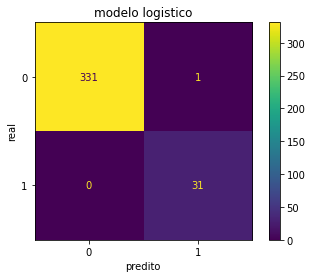

In [23]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='lbfgs')
lg.fit(xtreino_tranform,y_treino)
y_pred_lg = lg.predict(xteste_transform) 
lg.predict_proba(xteste_transform)[:3]
plot_confusion_matrix(lg,xteste_transform,y_teste,values_format='')
plt.ylabel('real')
plt.xlabel('predito')
plt.title('modelo logistico')
plt.show()

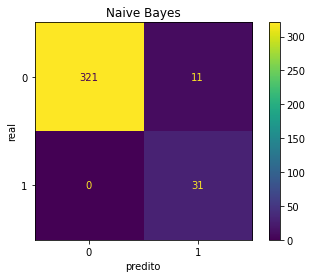

In [24]:

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtreino_tranform, y_treino)
y_pred_gnb = gnb.predict(xteste_transform)
gnb.predict_proba(xteste_transform)
plot_confusion_matrix(gnb,xteste_transform,y_teste,values_format='')
plt.ylabel('real')
plt.xlabel('predito')
plt.title('Naive Bayes')
plt.show()

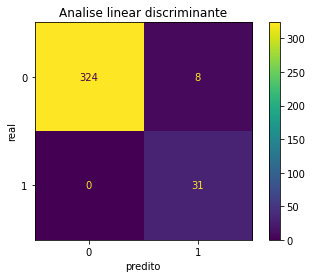

In [25]:


# Linear Discriminan Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(xtreino_tranform, y_treino)
LinearDiscriminant_Analysis = lda.score(xteste_transform,y_teste)  
y_pred_lda = lda.predict(xteste_transform) 
lda.predict_proba(xteste_transform)
plot_confusion_matrix(lda,xteste_transform,y_teste,values_format='')
plt.ylabel('real')
plt.xlabel('predito')
plt.title('Analise linear discriminante')
plt.show()

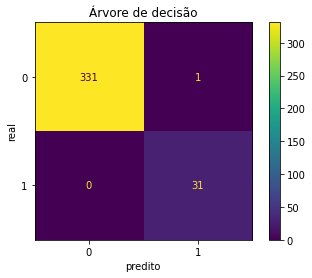

In [26]:
# Decison tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtreino_tranform,y_treino)
dtc.fit(xtreino_tranform, y_treino)
y_pred_Dtc = dtc.predict(xteste_transform) 
plot_confusion_matrix(dtc,xteste_transform,y_teste,values_format='')
plt.ylabel('real')
plt.xlabel('predito')
plt.title('Árvore de decisão')
plt.show()

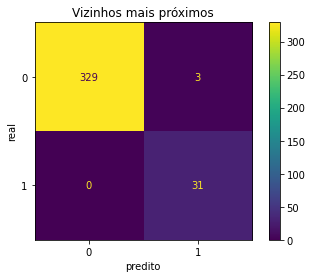

In [27]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=6)
knc.fit(xtreino_tranform,y_treino) 
y_pred_knc = knc.predict(xteste_transform)
plot_confusion_matrix(knc,xteste_transform,y_teste,values_format='')
plt.ylabel('real')
plt.xlabel('predito')
plt.title('Vizinhos mais próximos')
plt.show()

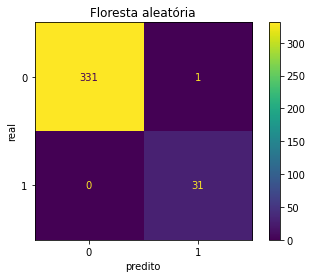

In [28]:
# Random forest classification
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(xtreino_tranform,y_treino)
Random_Forest_Classifier = clf.score(xteste_transform,y_teste) 
y_pred_RFC = clf.predict(xteste_transform)
plot_confusion_matrix(clf,xteste_transform,y_teste,values_format='')
plt.ylabel('real')
plt.xlabel('predito')
plt.title('Floresta aleatória')
plt.show()

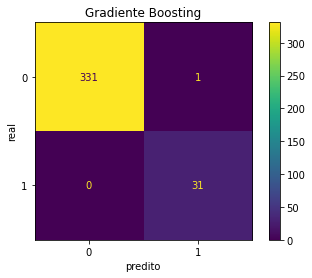

In [29]:
# xgboost classification
from xgboost.sklearn import XGBClassifier
xgbr= XGBClassifier()
xgbr.fit(xtreino_tranform, y_treino)
XGB_Classifier= xgbr.score(xteste_transform,y_teste) 
y_pred_xgb = xgbr.predict(xteste_transform) 
plot_confusion_matrix(xgbr,xteste_transform,y_teste,values_format='')
plt.ylabel('real')
plt.xlabel('predito')
plt.title('Gradiente Boosting')
plt.show()

Hora de ver as performances

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


df =  { 'Accuracy': [accuracy_score(y_teste, y_pred_gnb),
                        accuracy_score(y_teste, y_pred_lg),
                        accuracy_score(y_teste, y_pred_RFC),
                        accuracy_score(y_teste, y_pred_xgb),
                        accuracy_score(y_teste, y_pred_Dtc),
                        accuracy_score(y_teste, y_pred_knc),
                       # accuracy_score(y_teste, y_pred_lsvc),
                        accuracy_score(y_teste, y_pred_lda)],
                     #   accuracy_score(y_teste, y_pred_qda)],
       
    'precision_score': [precision_score(y_teste, y_pred_gnb, average="macro"),
                        precision_score(y_teste, y_pred_lg, average="macro"),
                        precision_score(y_teste, y_pred_RFC, average="macro"),
                        precision_score(y_teste, y_pred_xgb, average="macro"),
                        precision_score(y_teste, y_pred_Dtc, average="macro"),
                        precision_score(y_teste, y_pred_knc, average="macro"),
                      #  precision_score(y_teste, y_pred_lsvc, average="macro"),
                        precision_score(y_teste, y_pred_lda, average="macro")],
                     #   precision_score(y_teste, y_pred_qda, average="macro")],

           'f1_score':  [f1_score(y_teste, y_pred_gnb, average="macro"),
                        f1_score(y_teste, y_pred_lg, average="macro"),
                        f1_score(y_teste, y_pred_RFC, average="macro"),
                        f1_score(y_teste, y_pred_xgb, average="macro"),
                        f1_score(y_teste, y_pred_Dtc, average="macro"),
                        f1_score(y_teste, y_pred_knc, average="macro"),
                     #   f1_score(y_teste, y_pred_lsvc, average="macro"),
                        f1_score(y_teste, y_pred_lda, average="macro")],
                     #   f1_score(y_teste, y_pred_qda, average="macro")],
       
       'recall_score':  [recall_score(y_teste, y_pred_gnb, average="macro"),
                        recall_score(y_teste, y_pred_lg, average="macro"),
                        recall_score(y_teste, y_pred_RFC, average="macro"),
                        recall_score(y_teste, y_pred_xgb, average="macro"),
                        recall_score(y_teste, y_pred_Dtc, average="macro"),
                        recall_score(y_teste, y_pred_knc, average="macro"),
                     #   recall_score(y_teste, y_pred_lsvc, average="macro"),
                        recall_score(y_teste, y_pred_lda, average="macro")]
                    #    recall_score(y_teste, y_pred_qda, average="macro")]
  
                        }
performance= pd.DataFrame(df)
performance.index= ['GaussianNB','Logistic_Regression','Random_Forest_Classifier','XGB_Classifier','DecisionTree_Classifier', 'KNeighbors_Classifier', 'LinearDiscriminant_Analysis']
performance

,Accuracy,precision_score,f1_score,recall_score
GaussianNB,0.969697,0.869048,0.916235,0.983434
Logistic_Regression,0.997245,0.984375,0.991309,0.998494
Random_Forest_Classifier,0.997245,0.984375,0.991309,0.998494
XGB_Classifier,0.997245,0.984375,0.991309,0.998494
DecisionTree_Classifier,0.997245,0.984375,0.991309,0.998494
KNeighbors_Classifier,0.991736,0.955882,0.974654,0.995482
LinearDiscriminant_Analysis,0.977961,0.897436,0.936760,0.987952
